In [16]:
import random
def  randomkid():
    return random.choice(["boy","girl"])
bothgirls = 0
oldergirls = 0
eithergirls =0

random.seed(0)
for _ in range(100000):
    younger = randomkid()
    older = randomkid()
   # print(younger,older)
    if older == "girl":
        oldergirls +=1
    if (older == "girl") and (younger == "girl"):
        bothgirls += 1
    if older == "girl" or younger == "girl":
        eithergirls += 1
print(oldergirls , bothgirls, eithergirls,younger)
print("2 girls | 1 girl" , bothgirls/oldergirls)
print("2 girls | 1 or 2 girl" , bothgirls/eithergirls)


50016 24951 74980 boy
2 girls | 1 girl 0.49886036468330136
2 girls | 1 or 2 girl 0.3327687383302214


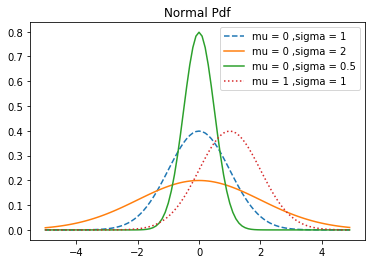

In [19]:
def uniformpdf(x):
    return 1 if x >= 0 and x < 1 else 0

import math
def normalpdf(x,mu=0,sigma = 1):
    sqrttwopi = math.sqrt(math.pi *2)
    return (1/(sigma*sqrttwopi))*(math.exp(-((x-mu)**2/(2*(sigma**2)))))
                                    
xs = [x/10.0 for x in range(-50,50)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xs , [normalpdf(x ,sigma = 1) for x in xs],"--",label="mu = 0 ,sigma = 1")
plt.plot(xs , [normalpdf(x ,sigma = 2) for x in xs],"-",label="mu = 0 ,sigma = 2")
plt.plot(xs , [normalpdf(x ,sigma = 0.5) for x in xs],"-",label="mu = 0 ,sigma = 0.5")
plt.plot(xs , [normalpdf(x ,mu = 1) for x in xs],":",label="mu = 1 ,sigma = 1")
plt.legend()
plt.title("Normal Pdf")
plt.show()
                                             

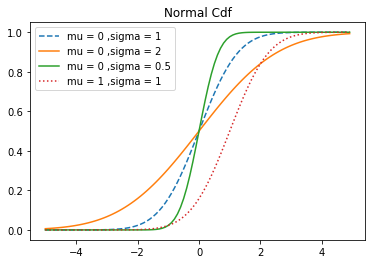

In [21]:
def normalcdf(x,mu = 0, sigma =1):
    return (1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2
xs = [x/10.0 for x in range(-50,50)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(xs , [normalcdf(x ,sigma = 1) for x in xs],"--",label="mu = 0 ,sigma = 1")
plt.plot(xs , [normalcdf(x ,sigma = 2) for x in xs],"-",label="mu = 0 ,sigma = 2")
plt.plot(xs , [normalcdf(x ,sigma = 0.5) for x in xs],"-",label="mu = 0 ,sigma = 0.5")
plt.plot(xs , [normalcdf(x ,mu = 1) for x in xs],":",label="mu = 1 ,sigma = 1")
plt.legend()
plt.title("Normal Cdf")
plt.show()


In [9]:
import math
def normalcdf(x,mu = 0, sigma =1):
    return (1 + math.erf((x-mu)/math.sqrt(2)/sigma))/2
def inversenormalcdf(p,mu=0,sigma=1,tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu+sigma *inversenormalcdf(p,tolerance = tolerance)
    lowz , lowp = -10.0, 0
    hiz ,hip = 10.0 , 0
    while hiz - lowz > tolerance:
        midz = (lowz + hiz)/2
        midp = normalcdf(midz)
        
        if midp < p:
            lowz ,lowp = midz , midp
        elif midp > p:
            hiz ,hip = midz ,midp
        else:
            break
    return midz

inversenormalcdf(0.2)

-0.8416271209716797

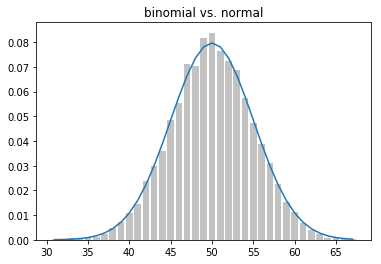

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import random
def bernoullitrial(p):
    return 1 if random.random() < p else 0
def binomial(n,p):
    return sum([bernoullitrial(p) for  _ in range(n)])

def makehist (p , n, num):
    data = [binomial(n , p ) for _ in range(num)]
    histgram = Counter(data)
    plt.bar([x  for x in histgram.keys()],
           [v/num for v in histgram.values()],
           0.8, color = "0.76")
    mu = p*n
    sigma= math.sqrt(n*p*(1-p))
    xs = range(min(data),max(data)+1)
    ys = [normalcdf(i+0.5 , mu, sigma) - normalcdf(i -0.5,mu ,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("binomial vs. normal")
    plt.show()
    
makehist(0.5,100,10000)